1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [5]:
import numpy as np
from scipy.interpolate import UnivariateSpline

max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
sorted_speed = np.sort(max_speeds)

i = np.arange(1, years_nb + 1)
cprob = i / (years_nb + 1)

quantile_func = UnivariateSpline(cprob, sorted_speed, s=0)
fifty_prob = 1. - 0.02
fifty_wind = quantile_func(fifty_prob)
print(fifty_wind)

36.96971413811491


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

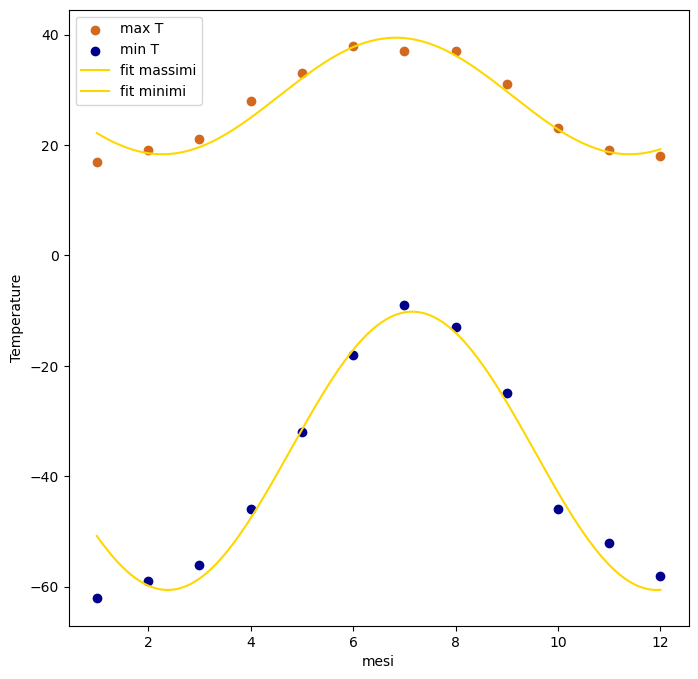

In [67]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

y1 = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
y2 = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
x = np.arange(1, 13)

plt.figure(figsize=(8,8))
plt.scatter(x, y1, label='max T', color='chocolate')
plt.scatter(x, y2, label='min T', color='darkblue')
plt.xlabel('mesi')
plt.ylabel('Temperature')

def func(x, A, nu, y0):
    return A * np.sin(nu * x) + y0
a = np.linspace(1, 12, 300)
popt_max, cov_max = curve_fit(func, x, y1, p0=[(y1.max()-y1.min())/2, 2*np.pi / 12, y1.mean()])
plt.plot(a, func(a, popt_max[0], popt_max[1], popt_max[2]), label='fit massimi', color='gold')

popt_min, cov_min = curve_fit(func, x, y2, p0=[(y2.max()-y2.min())/2, 2*np.pi / 12, y2.mean()])
plt.plot(a, func(a, *popt_min), label='fit minimi', color='gold')



plt.legend(loc='upper left')
plt.show()


#manca l'ultimo punto 

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


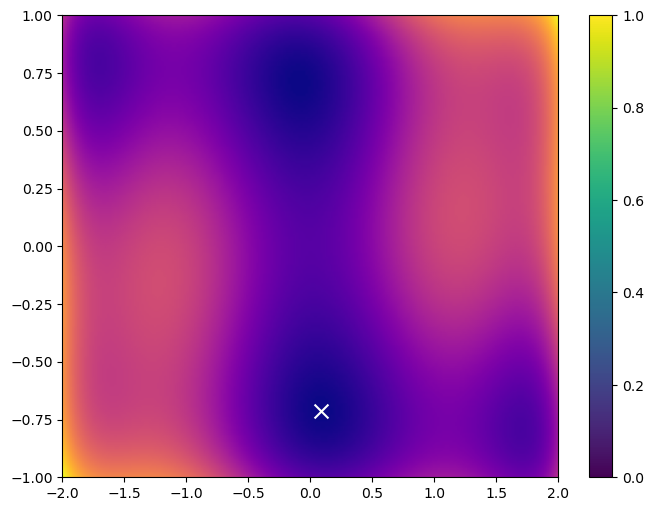

In [17]:
from scipy.optimize import minimize
import numpy as np

x = np.linspace(-2,2,200)
y = np.linspace(-1,1,200)

def f(v):
    x, y = v
    return (4-2.1 * x**2 + x**4 / 3) * x**2 + x*y + (4 * y**2 - 4) * y**2
def F(x, y):
    return (4-2.1 * x**2 + x**4 / 3) * x**2 + x*y + (4 * y**2 - 4) * y**2

X, Y = np.meshgrid(x, y)
Z = F(X, Y)

fig = plt.figure(figsize=(8,6))


x0 = np.linspace(-0.5, 0.5, 100)
y0 = np.linspace(-1, -1, 100)
minimi = []

for i in x0:
    for j in y0:
        res = minimize(f, [i,j])
        minimi.append(res.x) #mette nella lista solo il valore di x
#         print(res)
# print(minimi)
min_glob = min(minimi, key=lambda a: a.min())
xmin, ymin = min_glob
plt.imshow(Z, extent=[x.min(), x.max(), y.min(), y.max()],
           origin='lower', cmap='plasma', aspect='auto')
plt.scatter(xmin, ymin, color='w', marker='x', s=100, label='minimo globale')
plt.colorbar()
plt.show()

Minimo trovato in: [-0.08984198  0.71265633]


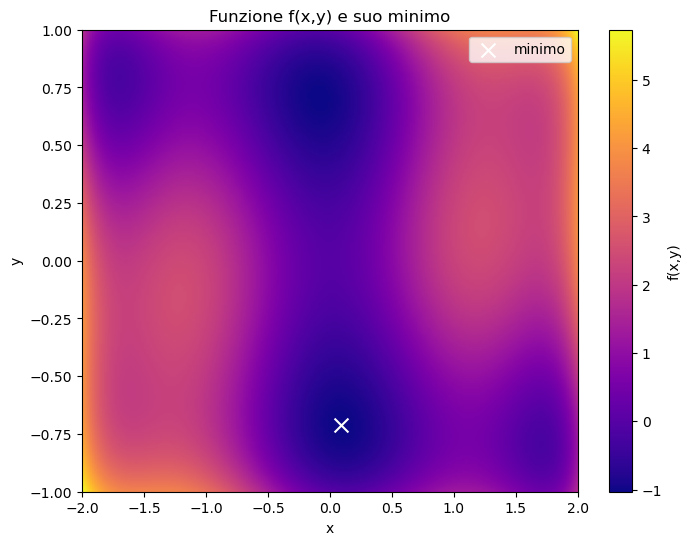

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# griglia per il plot
x = np.linspace(-2, 2, 200)
y = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x, y)

# definizione funzione in forma vettoriale per minimize
def f(v):
    x, y = v
    return (4 - 2.1*x**2 + x**4/3)*x**2 + x*y + (4*y**2 - 4)*y**2

# calcolo Z per il plot
Z = (4 - 2.1*X**2 + X**4/3)*X**2 + X*Y + (4*Y**2 - 4)*Y**2

# minimizzazione
x0 = [-1, -1]   # punto iniziale
res = minimize(f, x0)


print("Minimo trovato in:", res.x)
# print("Valore minimo:", res.fun)
# print(res)

# plot della funzione
plt.figure(figsize=(8,6))
plt.imshow(Z, extent=[x.min(), x.max(), y.min(), y.max()],
           origin='lower', cmap='plasma', aspect='auto')
plt.colorbar(label='f(x,y)')
plt.scatter(xmin, ymin, color='white', s=100, marker='x', label='minimo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Funzione f(x,y) e suo minimo')
plt.legend()
plt.show()


Altra bella idea 


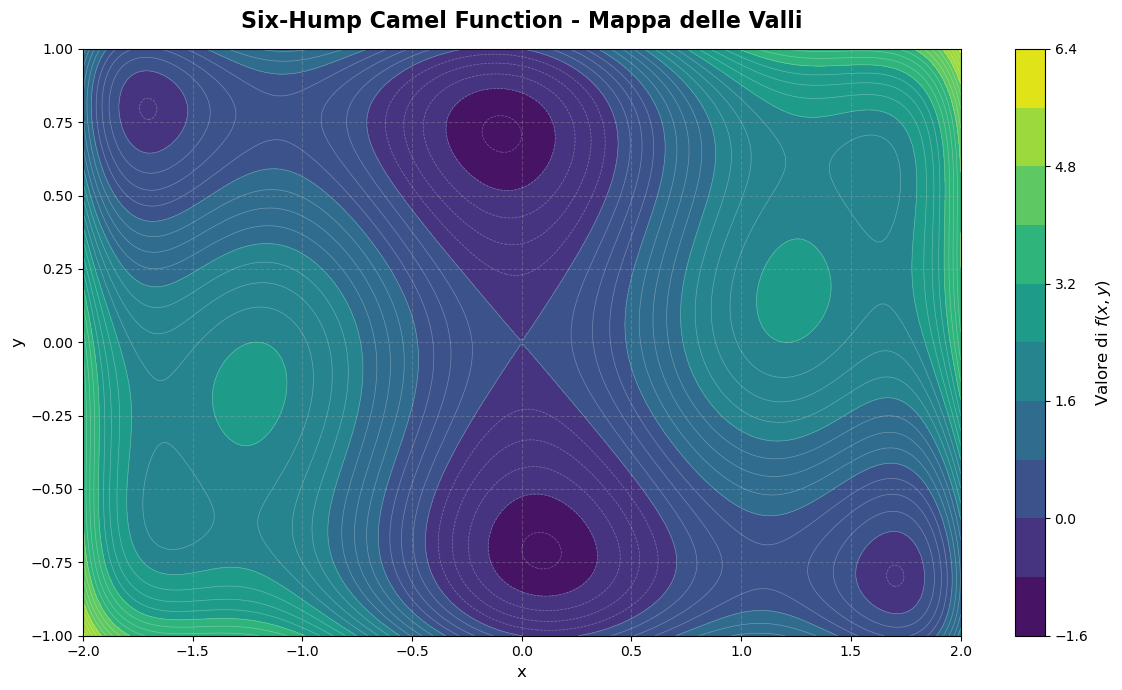

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definizione della funzione
def f(x, y):
    return (4 - 2.1 * x**2 + x**4 / 3) * x**2 + x * y + (4 * y**2 - 4) * y**2

x = np.linspace(-2, 2, 200)
y = np.linspace(-1, 1, 200)
xv, yv = np.meshgrid(x, y)
zv = f(xv, yv)

plt.figure(figsize=(12, 7))
contour = plt.contourf(xv, yv, zv, levels=10, cmap='viridis')
cbar = plt.colorbar(contour)
cbar.set_label("Valore di $f(x, y)$", fontsize=12)
plt.contour(xv, yv, zv, levels=40, colors='white', alpha=0.3, linewidths=0.5)

plt.title("Six-Hump Camel Function - Mappa delle Valli", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

codice di giovanni fatto bene

[  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.0316284534898743
        x: [ 8.984e-02 -7.127e-01]
      nit: 5
      jac: [ 1.490e-08 -1.937e-07]
 hess_inv: [[ 1.293e-01 -8.130e-03]
            [-8.130e-03  6.241e-02]]
     nfev: 24
     njev: 8,   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.0316284534898768
        x: [-8.984e-02  7.127e-01]
      nit: 5
      jac: [-1.490e-08  1.937e-07]
 hess_inv: [[ 1.293e-01 -8.130e-03]
            [-8.130e-03  6.241e-02]]
     nfev: 24
     njev: 8]
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.0
        x: [ 0.000e+00  0.000e+00]
      nit: 0
      jac: [ 5.960e-08 -5.960e-08]
 hess_inv: [[1 0]
            [0 1]]
     nfev: 3
     njev: 1


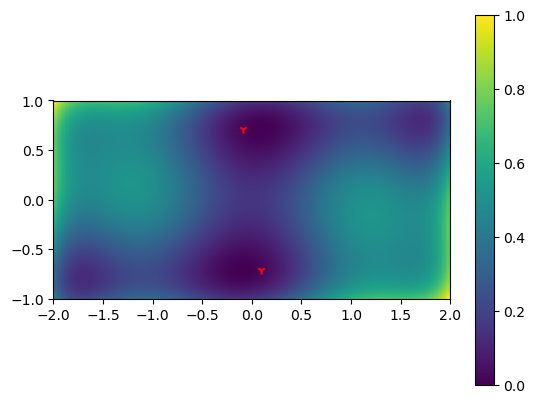

In [30]:
import scipy as sp
def f(x): return (4-2.1*x[0]**2+x[0]**4/3)*x[0]**2+x[0]*x[1]+(x[1]**2-1)*4*x[1]**2

x,y = np.meshgrid(np.linspace(-2,2,100),np.linspace(-1,1,100))

solution = [sp.optimize.minimize(f,i) for i in [[0,-.75],[0,.75]]]
print(solution)

print(sp.optimize.minimize(f,[0,0]))

plt.imshow(f([x,y]), extent=[-2,2,-1,1])
for sol in solution: plt.scatter(sol.x[0], sol.x[1], marker='1', color='r')
plt.colorbar()
plt.show()

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

In [33]:
import pandas as pd
path = '/home/nicol/LaboratoryOfComputationalPhysics_Y8/populations.txt'
df = pd.read_csv(path, sep='\t', index_col=0) #uses the first column as separator 
df.head(5)

,hare,lynx,carrot
# year,,,
1900,30000.0,4000.0,48300
1901,47200.0,6100.0,48200
1902,70200.0,9800.0,41500
1903,77400.0,35200.0,38200
1904,36300.0,59400.0,40600


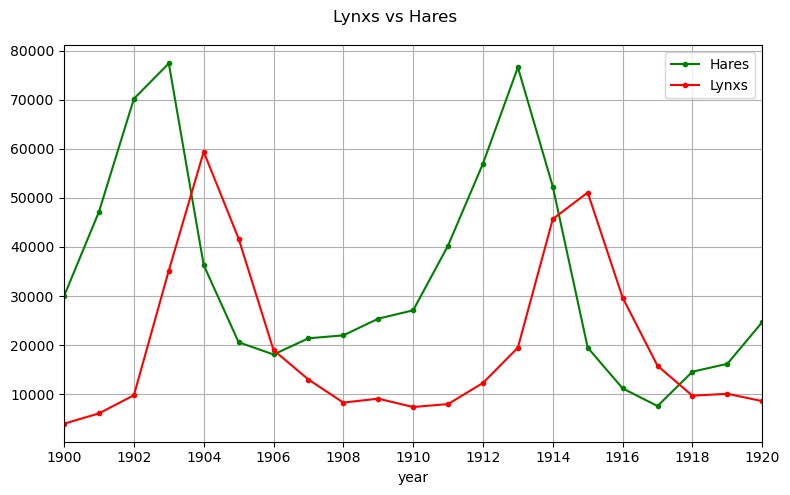

In [34]:
plt.figure(figsize=(8,5))
plt.plot(df.index, df['hare'].values, marker='.', color='green', label='Hares')
plt.plot(df.index, df['lynx'].values, marker='.', color='red', label='Lynxs')

plt.grid(True)
plt.xlabel('year')
plt.xticks(np.arange(1900, 1922, 2))
plt.xlim([1900, 1920])
plt.suptitle('Lynxs vs Hares')
plt.legend()
plt.tight_layout()
plt.show()


In [36]:


from scipy import fftpack

hares = df['hare'].values # the signal has to be only data info not metadata info
lynxes = df['lynx'].values

# Compute FFT and frequencies
hare_fft = fftpack.fft(hares)
lynx_fft = fftpack.fft(lynxes)
frequencies = fftpack.fftfreq(len(hares), d=1)  # Assuming annual data, so d=1 year -> fourier frequencies

# Keep only the positive frequencies for analysis
positive_freq = frequencies[frequencies > 0] # ca N/2
hare_amplitudes = np.abs(hare_fft[:len(positive_freq)]) # the first N/2 are relative to the positive one (return of fftpack)
lynx_amplitudes = np.abs(lynx_fft[:len(positive_freq)])

# Find the dominant frequency
hare_peak_idx = np.argmax(hare_amplitudes) #returns indices of peak
lynx_peak_idx = np.argmax(lynx_amplitudes)

hare_dominant_period = 1 / positive_freq[hare_peak_idx]
lynx_dominant_period = 1 / positive_freq[lynx_peak_idx]

print(f"Hare dominant frequency: {positive_freq[hare_peak_idx]:.2f} 1/years")
print(f"Lynx dominant frequency: {positive_freq[lynx_peak_idx]:.2f} 1/years")

print(f"Hare dominant period: {hare_dominant_period:.2f} years")
print(f"Lynx dominant period: {lynx_dominant_period:.2f} years")



Hare dominant frequency: 0.05 1/years
Lynx dominant frequency: 0.05 1/years
Hare dominant period: 21.00 years
Lynx dominant period: 21.00 years


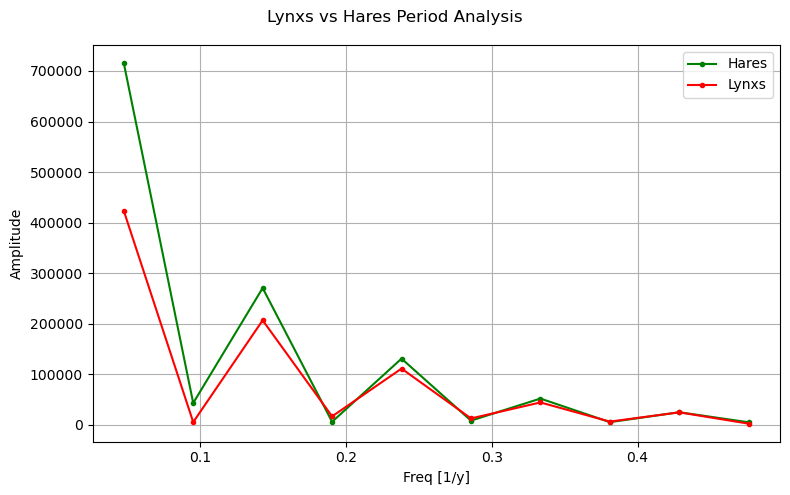

In [37]:


plt.figure(figsize=(8,5))
plt.plot(positive_freq, hare_amplitudes, marker='.', color='green', label='Hares')
plt.plot(positive_freq, lynx_amplitudes, marker='.', color='red', label='Lynxs')

plt.grid(True)
plt.xlabel('Freq [1/y]')
plt.ylabel('Amplitude')
#plt.xticks(np.arange(1900, 1922, 2))
#plt.xlim([1900, 1920])
plt.suptitle('Lynxs vs Hares Period Analysis')
plt.legend()
plt.tight_layout()
plt.show()



5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

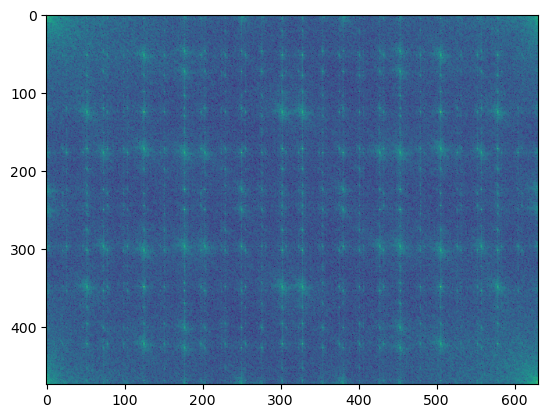

In [39]:
img = plt.imread('moonlanding.png')
ff = sp.fft.fft2(img)
'''
The FFT of an image results in a complex-valued array, where each element represents 
the amplitude and phase of a particular frequency component.
By taking the absolute value (np.abs), you are extracting the magnitude information 
from the complex FFT result. The magnitude represents the strength or intensity of each 
frequency component.

Taking the logarithm of the magnitude is a common practice to compress the dynamic range of the data.
'''

plt.imshow(np.log(1+np.abs(ff)))
#plt.imshow(1+np.abs(ff))


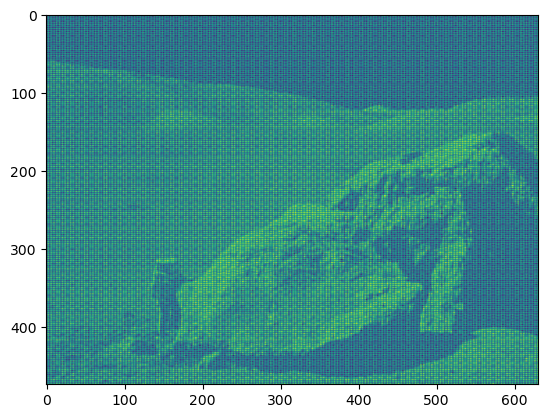

In [40]:


# Mask out high-frequency components (adjust the size as needed)
mask = np.ones_like(ff)
r, c = ff.shape
mask[int(r*0.1):int(r*0.9), int(c*0.1):int(c*0.9)] = 0

spect_cp = ff.copy()
# Apply the mask to the FFT result
spect_cp = spect_cp * mask

new_im = sp.fft.ifft2(spect_cp).real
plt.imshow(new_im)

